In [5]:
%reset

import matplotlib.pyplot as plt

from sklearn.metrics import accuracy_score
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow_datasets as tfds
from sklearn.preprocessing import StandardScaler
import os
from catboost import CatBoostClassifier
import catboost as cb

file_dir = os.path.realpath(os.path.dirname('__file__'))

In [6]:


ds1,ds2,ds3 = tfds.load('patch_camelyon',split=['train[:20%]','test[:5%]','validation[:5%]'],
                        data_dir = file_dir,
                        download=False,
                        shuffle_files=True,
                        as_supervised=True,
                        batch_size=-1)



In [ ]:
#Creating catboost model with 96x96 grayscale images
def convert_sample(image):
    image = tf.image.rgb_to_grayscale(image)
    image = tf.image.resize(image,[96,96]).numpy()
    image = image.reshape(1,-1)
    return image

train_dataset       = tfds.as_numpy(ds1)
train_dataset_image_96x96_grayscale = np.vstack(list(map(convert_sample, train_dataset[0])))
train_dataset_image_96x96_grayscale_scaled = StandardScaler(with_mean=0,with_std=1).fit_transform(train_dataset_image_96x96_grayscale)
train_dataset_label = train_dataset[1].reshape(-1,)

validation_dataset  = tfds.as_numpy(ds3)
validation_date_image_96x96_grayscale = np.vstack(list(map(convert_sample, validation_dataset[0])))
validation_date_image_96x96_grayscale_scaled = StandardScaler(with_mean=0,with_std=1).fit_transform(validation_date_image_96x96_grayscale)
validation_dataset_label = validation_dataset[1].reshape(-1,)

test_dataset       = tfds.as_numpy(ds2)
test_dataset_image_96x96_grayscale = np.vstack(list(map(convert_sample, test_dataset[0])))
test_dataset_image_96x96_grayscale_scaled = StandardScaler(with_mean=0,with_std=1).fit_transform(test_dataset_image_96x96_grayscale)
test_dataset_label = test_dataset[1].reshape(-1,)

In [ ]:
#Creating catboost model with 96x96 RGB images and 96x96 grayscale images and fitting the model
catboost = CatBoostClassifier(iterations=500, learning_rate=0.2, depth=6,l2_leaf_reg=7, loss_function='CrossEntropy', eval_metric='Accuracy', random_seed=42,data_partition='FeatureParallel' )
fitted_catboost = catboost.fit(train_dataset_image_96x96_grayscale_scaled, train_dataset_label,eval_set=(validation_date_image_96x96_grayscale_scaled, validation_dataset_label), use_best_model=True)

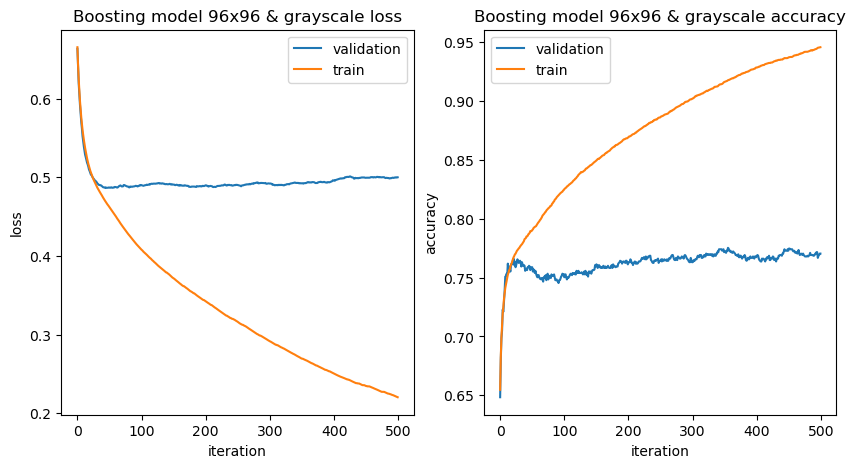

In [4]:
#Creating the plots for catboost model with 96x96 grayscale images
df_test = pd.read_csv(file_dir + r'\catboost_info\test_error.tsv', sep='\t')
df_train = pd.read_csv(file_dir + r'\catboost_info\learn_error.tsv', sep='\t')

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(df_test['CrossEntropy'])
plt.plot(df_train['CrossEntropy'])
plt.title('Boosting model 96x96 & grayscale loss')
plt.ylabel('loss')
plt.xlabel('iteration')
plt.legend(['validation', 'train'], loc='upper right')


plt.subplot(1,2,2)
plt.plot(df_test['Accuracy'])
plt.plot(df_train['Accuracy'])
plt.title('Boosting model 96x96 & grayscale accuracy')
plt.ylabel('accuracy')
plt.xlabel('iteration')
plt.legend(['validation', 'train'], loc='upper left')
plt.show()

In [ ]:
y_test_hat = fitted_catboost.predict(test_dataset_image_96x96_grayscale_scaled)
accuracy = accuracy_score(test_dataset_label, y_test_hat)
print(f'Baseline model accuracy: {round(accuracy * 100, 1)}% accuracy.')
# model with 96x96 grayscale images = 75.2% accuracy

In [7]:
#Creating catboost model with 96x96 RGB images no grayscale
def convert_sample(image):
    image = tf.image.resize(image,[96,96]).numpy()
    image = image.reshape(1,-1)
    return image

train_dataset       = tfds.as_numpy(ds1)
train_dataset_image_96x96 = np.vstack(list(map(convert_sample, train_dataset[0])))
train_dataset_image_96x96_scaled = StandardScaler(with_mean=0,with_std=1).fit_transform(train_dataset_image_96x96)
train_dataset_label = train_dataset[1].reshape(-1,)

validation_dataset  = tfds.as_numpy(ds3)
validation_date_image_96x96 = np.vstack(list(map(convert_sample, validation_dataset[0])))
validation_date_image_96x96_scaled = StandardScaler(with_mean=0,with_std=1).fit_transform(validation_date_image_96x96)
validation_dataset_label = validation_dataset[1].reshape(-1,)

test_dataset       = tfds.as_numpy(ds2)
test_dataset_image_96x96 = np.vstack(list(map(convert_sample, test_dataset[0])))
test_dataset_image_96x96_scaled = StandardScaler(with_mean=0,with_std=1).fit_transform(test_dataset_image_96x96)
test_dataset_label = test_dataset[1].reshape(-1,)


In [8]:
#Creating catboost model with 96x96 RGB images and fitting the model
catboost = CatBoostClassifier(iterations=500, learning_rate=0.2, depth=6,l2_leaf_reg=7, loss_function='CrossEntropy', eval_metric='Accuracy', random_seed=42,data_partition='FeatureParallel' )
fitted_catboost = catboost.fit(train_dataset_image_96x96_scaled, train_dataset_label,eval_set=(validation_date_image_96x96_scaled, validation_dataset_label), use_best_model=True)

0:	learn: 0.6657766	test: 0.6831502	best: 0.6831502 (0)	total: 1m 47s	remaining: 14h 56m 53s
1:	learn: 0.6919834	test: 0.7203907	best: 0.7203907 (1)	total: 1m 53s	remaining: 7h 52m 4s
2:	learn: 0.7079860	test: 0.7222222	best: 0.7222222 (2)	total: 1m 56s	remaining: 5h 21m 43s
3:	learn: 0.7192966	test: 0.7258852	best: 0.7258852 (3)	total: 1m 59s	remaining: 4h 5m 57s
4:	learn: 0.7265445	test: 0.7307692	best: 0.7307692 (4)	total: 2m 1s	remaining: 3h 20m 26s
5:	learn: 0.7326861	test: 0.7362637	best: 0.7362637 (5)	total: 2m 3s	remaining: 2h 50m 7s
6:	learn: 0.7404490	test: 0.7423687	best: 0.7423687 (6)	total: 2m 6s	remaining: 2h 28m 33s
7:	learn: 0.7443209	test: 0.7399267	best: 0.7423687 (6)	total: 2m 8s	remaining: 2h 12m 10s
8:	learn: 0.7478113	test: 0.7490842	best: 0.7490842 (8)	total: 2m 11s	remaining: 1h 59m 44s
9:	learn: 0.7498903	test: 0.7533578	best: 0.7533578 (9)	total: 2m 14s	remaining: 1h 49m 37s
10:	learn: 0.7533045	test: 0.7490842	best: 0.7533578 (9)	total: 2m 16s	remaining: 1h 4

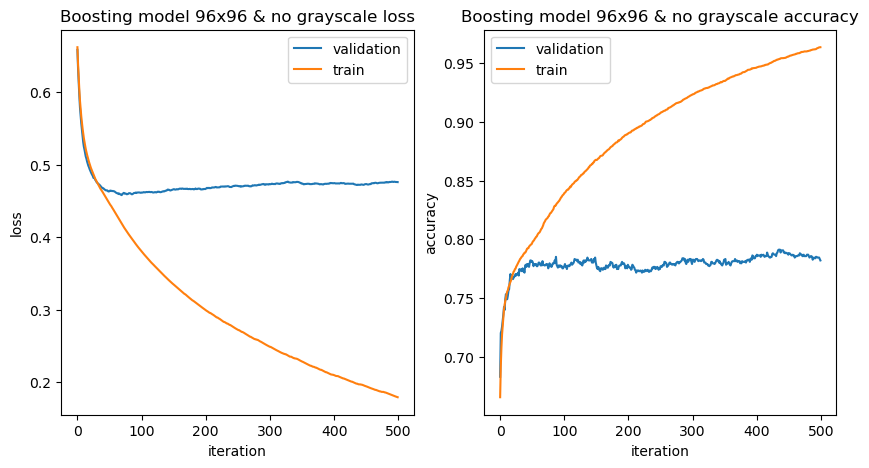

In [9]:
#creating the plots for catboost model with 96x96 RGB images
df_test = pd.read_csv(file_dir + r'\catboost_info\test_error.tsv', sep='\t')
df_train = pd.read_csv(file_dir + r'\catboost_info\learn_error.tsv', sep='\t')

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(df_test['CrossEntropy'])
plt.plot(df_train['CrossEntropy'])
plt.title('Boosting model 96x96 & no grayscale loss')
plt.ylabel('loss')
plt.xlabel('iteration')
plt.legend(['validation', 'train'], loc='upper right')


plt.subplot(1,2,2)
plt.plot(df_test['Accuracy'])
plt.plot(df_train['Accuracy'])
plt.title('Boosting model 96x96 & no grayscale accuracy') 
plt.ylabel('accuracy')
plt.xlabel('iteration')
plt.legend(['validation', 'train'], loc='upper left')
plt.show()


In [10]:
y_test_hat = fitted_catboost.predict(test_dataset_image_96x96_scaled)
accuracy = accuracy_score(test_dataset_label, y_test_hat)
print(f'Catboost model 96x96 no grayscale accuracy: {round(accuracy * 100, 1)}% accuracy.')
# model with 96x96 RGB images = 75.4% accuracy

Catboost model 96x96 no grayscale accuracy: 75.4% accuracy.


In [11]:
#Creating catboost model with 32x32 and no grayscale images
def convert_sample(image):
    image = tf.image.resize(image,[32,32]).numpy()
    image = image.reshape(1,-1)
    return image

train_dataset       = tfds.as_numpy(ds1)
train_dataset_image_32x32 = np.vstack(list(map(convert_sample, train_dataset[0])))
train_dataset_image_32x32_scaled = StandardScaler(with_mean=0,with_std=1).fit_transform(train_dataset_image_32x32)
train_dataset_label = train_dataset[1].reshape(-1,)
validation_dataset  = tfds.as_numpy(ds3)
validation_date_image_32x32 = np.vstack(list(map(convert_sample, validation_dataset[0])))
validation_date_image_32x32_scaled = StandardScaler(with_mean=0,with_std=1).fit_transform(validation_date_image_32x32)
validation_dataset_label = validation_dataset[1].reshape(-1,)
test_dataset       = tfds.as_numpy(ds2)
test_dataset_image_32x32 = np.vstack(list(map(convert_sample, test_dataset[0])))
test_dataset_image_32x32_scaled = StandardScaler(with_mean=0,with_std=1).fit_transform(test_dataset_image_32x32)
test_dataset_label = test_dataset[1].reshape(-1,)

In [ ]:
#Creating catboost model with 32x32 RGB images and fitting the model
catboost = CatBoostClassifier(iterations=500, learning_rate=0.2, depth=6,l2_leaf_reg=7, loss_function='CrossEntropy', eval_metric='Accuracy', random_seed=42,data_partition='FeatureParallel' )
fitted_catboost = catboost.fit(train_dataset_image_32x32_scaled, train_dataset_label,eval_set=(validation_date_image_32x32_scaled, validation_dataset_label), use_best_model=True)

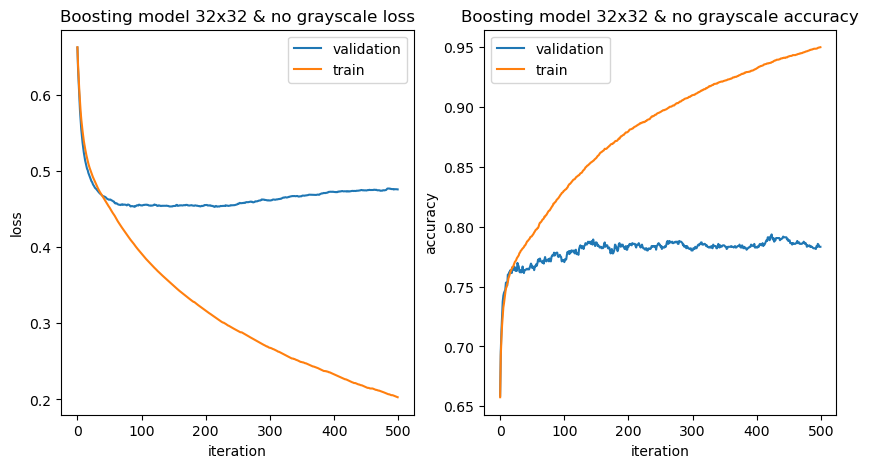

In [13]:
#creating the plots for catboost model with 32x32 RGB images
df_test = pd.read_csv(file_dir + r'\catboost_info\test_error.tsv', sep='\t')
df_train = pd.read_csv(file_dir + r'\catboost_info\learn_error.tsv', sep='\t')

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(df_test['CrossEntropy'])
plt.plot(df_train['CrossEntropy'])
plt.title('Boosting model 32x32 & no grayscale loss')
plt.ylabel('loss')
plt.xlabel('iteration')
plt.legend(['validation', 'train'], loc='upper right')


plt.subplot(1,2,2)
plt.plot(df_test['Accuracy'])
plt.plot(df_train['Accuracy'])
plt.title('Boosting model 32x32 & no grayscale accuracy')
plt.ylabel('accuracy')
plt.xlabel('iteration')
plt.legend(['validation', 'train'], loc='upper left')
plt.show()

In [14]:
#Predicting the model on the test dataset
y_test_hat = fitted_catboost.predict(test_dataset_image_32x32_scaled)
accuracy = accuracy_score(test_dataset_label, y_test_hat)
print(f'Catboost model 32x32 no grayscale accuracy: {round(accuracy * 100, 1)}% accuracy.')
# model with 32x32 RGB images = 76.4% accuracy

Catboost model 32x32 no grayscale accuracy: 76.4% accuracy.
